In [89]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter

In [2]:
from Utils import Read_data as Rd

In [3]:
path = "DataPaper/"
users = os.listdir(path)

In [4]:
df_info = Rd.create_dataset(users,'user_info')
df_info.head()

,Gender,Weight,Height,Age,user
0,M,65,169,29.0,user_1
0,M,85,180,27.0,user_10
0,M,115,186,27.0,user_11
0,M,67,170,27.0,user_12
0,M,74,180,25.0,user_13


In [5]:
df_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,22.0,75.045455,12.789420,60.0,67.0,70.0,80.0,115.0
Height,22.0,179.909091,8.216760,169.0,175.0,180.0,183.0,205.0
Age,21.0,27.285714,4.208834,20.0,25.0,27.0,28.0,40.0


In [6]:
df_sleep = Rd.create_dataset(users,'sleep')
df_sleep.head()

,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,user
0,2,00:46,2,03:31,2,00:46,NaN,87.27,165,144,21,9,2.33,9.091,10.000,19.091,user_1
1,2,03:57,2,07:30,2,03:57,NaN,92.02,213,196,17,9,1.89,8.920,NaN,8.920,user_1
0,2,02:40,2,08:09,2,02:44,4.0,75.08,329,247,78,13,6.00,20.669,7.692,28.361,user_10
0,2,00:32,2,06:36,2,00:32,NaN,94.23,364,343,21,12,1.75,9.066,15.385,24.451,user_12
0,1,23:41,1,05:04,1,23:41,NaN,76.47,323,247,76,19,4.00,17.957,15.789,33.746,user_13


In [10]:
df_sleep['user'].iloc[1] = 'user_11'

C:\Users\anisr\AppData\Local\Temp\ipykernel_18100\2834560777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['user'].iloc[1] = 'user_11'


In [11]:
print(df_sleep.shape)
print(df_info.shape)

(22, 17)
(22, 5)


In [12]:
df_sleep['In Bed Time'] = [
    int(x.split(':')[0])*60+int(x.split(':')[1]) for x in df_sleep['In Bed Time']]
df_sleep['In Bed Time'] = [x-24*60 if x > 20 *
                           60 else x for x in df_sleep['In Bed Time']]

df_sleep['Out Bed Time'] = [
    int(x.split(':')[0])*60+int(x.split(':')[1]) for x in df_sleep['Out Bed Time']]
df_sleep['Out Bed Time'] = [x-24*60 if x > 20 *
                            60 else x for x in df_sleep['Out Bed Time']]

df_sleep['Onset Time'] = [
    int(x.split(':')[0])*60+int(x.split(':')[1])for x in df_sleep['Onset Time']]
df_sleep['Onset Time'] = [x-24*60 if x > 20 *
                          60 else x for x in df_sleep['Onset Time']]

df_sleep = df_sleep.fillna(0)

In [16]:
df_sleep.describe().T

,count,mean,std,min,25%,50%,75%,max
In Bed Date,22.0,1.818182,0.394771,1.000,2.0000,2.0000,2.00000,2.000
In Bed Time,22.0,49.909091,72.694343,-91.000,18.2500,45.0000,65.25000,237.000
Out Bed Date,22.0,1.818182,0.394771,1.000,2.0000,2.0000,2.00000,2.000
Out Bed Time,22.0,424.227273,88.279282,211.000,395.2500,422.0000,471.00000,660.000
Onset Date,22.0,1.818182,0.394771,1.000,2.0000,2.0000,2.00000,2.000
Onset Time,22.0,51.409091,72.551236,-88.000,21.5000,45.0000,67.50000,237.000
Latency,22.0,1.500000,1.711307,0.000,0.0000,0.5000,3.00000,4.000
Efficiency,22.0,83.906818,6.746207,73.490,77.1600,85.2200,89.06000,94.230
Total Minutes in Bed,22.0,374.318182,96.184043,165.000,329.7500,368.5000,431.00000,630.000
Total Sleep Time (TST),22.0,313.000000,84.309520,144.000,253.5000,326.0000,342.75000,578.000


C:\Users\anisr\AppData\Local\Temp\ipykernel_18100\260580365.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_sleep['In Bed Time'],
C:\Users\anisr\AppData\Local\Temp\ipykernel_18100\260580365.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_sleep['Out Bed Time'],


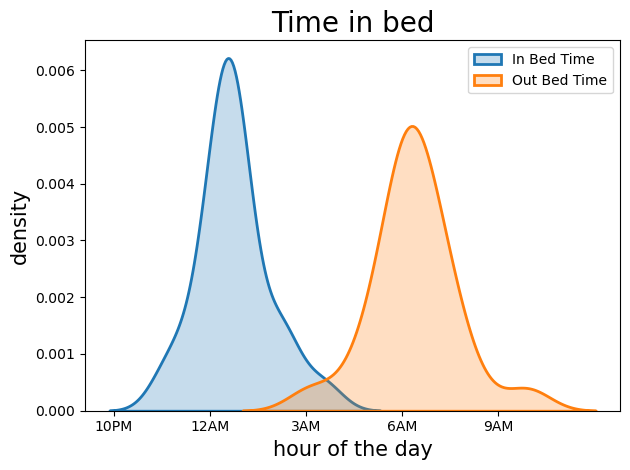

In [22]:
f, ax = plt.subplots()
sns.kdeplot(df_sleep['In Bed Time'], 
            shade=True, linestyle='-', lw=2,label = 'In Bed Time')
sns.kdeplot(df_sleep['Out Bed Time'], 
            shade=True, linestyle='-', lw=2,label = 'Out Bed Time')
ax.set_title('Time in bed', fontsize=20)
ax.set_ylabel('density', fontsize=15)
ax.set_xlabel('hour of the day', fontsize=15)
plt.xticks(list(range(-200, 800, 200)), ['10PM', '12AM', '3AM', '6AM', '9AM'])
f.tight_layout()
plt.legend()
plt.show()


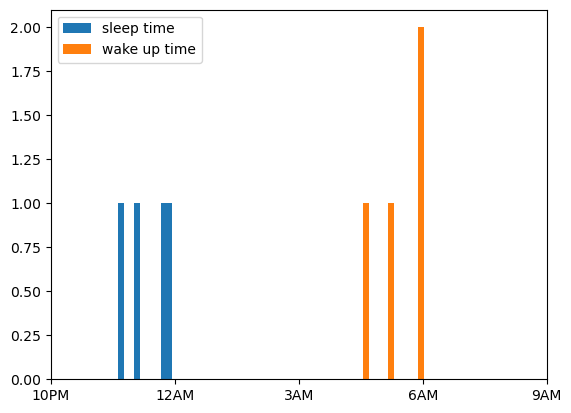

In [35]:
plt.hist(df_sleep[df_sleep['In Bed Time'] <0]['In Bed Time'],label = 'sleep time')
plt.hist(df_sleep[df_sleep['In Bed Time'] <0]['Out Bed Time'],label = 'wake up time')
plt.xticks(list(range(-200, 800, 200)), ['10PM', '12AM', '3AM', '6AM', '9AM'])
plt.legend()

In [41]:
df_sleep_merged = df_info[['user','Age']].merge(df_sleep,on='user')

In [55]:
print(df_sleep_merged[df_sleep_merged['In Bed Time'] < 0]['Age'].count())
print(df_sleep_merged[df_sleep_merged['In Bed Time'] < 0]['Age'].mean())

4
26.5


In [57]:
print(df_sleep_merged[(df_sleep_merged['In Bed Time'] > 0) & (df_sleep_merged['In Bed Time'] <200)]['Age'].count())
print(df_sleep_merged[(df_sleep_merged['In Bed Time'] > 0) & (df_sleep_merged['In Bed Time'] < 200)]['Age'].mean())

16
27.5


In [60]:
print(df_sleep_merged[df_sleep_merged['In Bed Time'] > 200]['Age'].count())

1


In [61]:
df_sleep_merged[df_sleep_merged['In Bed Time'] > 200]

,user,Age,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
2,user_11,27.0,2,237,2,450,2,237,0.0,92.02,213,196,17,9,1.89,8.92,0.0,8.92


In [59]:
print(list(range(-200, 800, 200)))
['10PM', '12AM', '3AM', '6AM', '9AM']

[-200, 0, 200, 400, 600]


['10PM', '12AM', '3AM', '6AM', '9AM']

In [62]:
df_sleep_merged[df_sleep_merged['Onset Time'] != df_sleep_merged['In Bed Time']]

,user,Age,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
1,user_10,27.0,2,160,2,489,2,164,4.0,75.08,329,247,78,13,6.00,20.669,7.692,28.361
6,user_15,24.0,2,75,2,339,2,76,1.0,89.39,264,236,27,15,1.80,18.561,0.000,18.561
7,user_16,27.0,2,22,2,478,2,26,4.0,74.34,456,339,113,39,2.90,16.228,15.385,31.613
9,user_18,NaN,2,55,2,413,2,58,3.0,84.36,358,302,53,9,5.89,16.480,20.000,36.480
10,user_19,22.0,1,-64,1,395,1,-63,1.0,74.07,459,340,118,44,2.68,18.954,22.222,41.176
11,user_2,27.0,2,50,2,382,2,54,4.0,73.49,332,244,84,18,4.67,15.060,5.556,20.616
14,user_22,32.0,2,66,2,424,2,69,3.0,84.92,358,304,51,21,2.43,14.804,13.636,28.440
15,user_3,34.0,1,-91,1,352,1,-88,3.0,79.23,443,351,89,16,5.56,18.962,0.000,18.962
16,user_4,27.0,2,57,2,430,2,61,4.0,85.52,373,319,50,28,1.79,8.847,14.286,23.133
20,user_8,40.0,2,17,2,433,2,20,3.0,80.77,416,336,77,27,2.85,17.308,25.926,43.234


In [136]:
df_activity = Rd.create_dataset(users,'activity')

In [137]:
df_activity['user'].unique()

array(['user_1', 'user_10', 'user_11', 'user_12', 'user_13', 'user_14',
       'user_15', 'user_16', 'user_17', 'user_18', 'user_19', 'user_2',
       'user_20', 'user_21', 'user_22', 'user_3', 'user_4', 'user_5',
       'user_6', 'user_7', 'user_8', 'user_9'], dtype=object)

In [138]:
dict_activity = {0: 'sleeping',
                 1: 'laying down',
                 2: 'sitting',
                 3: 'light movement',
                 4: 'medium movement',
                 5: 'heavy movement',
                 6: 'eating',
                 7: 'small screen usage',
                 8: 'large screen',
                 9: 'coffee/coke',
                 10: 'smoking',
                 11: 'alcohol assumption',
                 12: 'saliva samples'}

df_activity['Activity'] = df_activity['Activity'].replace(
    dict_activity) 

In [139]:
df_activity[(df_activity['Activity'] == 'smoking') | (df_activity['Activity'] == 'alcohol assumption')]['user'].unique()

array(['user_1', 'user_10', 'user_11', 'user_18', 'user_20', 'user_22'],
      dtype=object)

In [140]:
smoking_drinking_id = df_activity[(df_activity['Activity'] == 'smoking') | (
    df_activity['Activity'] == 'alcohol assumption')]['user'].unique()

In [141]:
people_drink_smoke = df_sleep_merged[df_sleep_merged['user'].isin(smoking_drinking_id)]
people_not_drink_smoke = df_sleep_merged[~df_sleep_merged['user'].isin(smoking_drinking_id)]

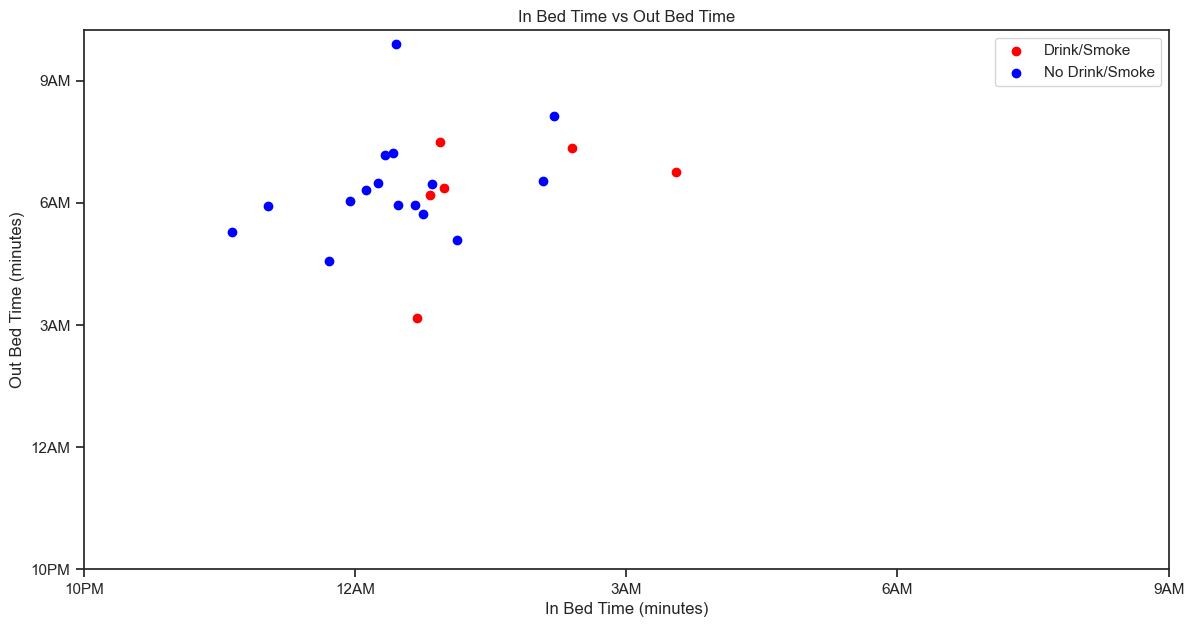

In [142]:
plt.figure(figsize=(14, 7))

plt.scatter(people_drink_smoke['In Bed Time'], people_drink_smoke['Out Bed Time'], color='red', label='Drink/Smoke')
plt.scatter(people_not_drink_smoke['In Bed Time'], people_not_drink_smoke['Out Bed Time'], color='blue', label='No Drink/Smoke')

plt.xlabel('In Bed Time (minutes)')
plt.ylabel('Out Bed Time (minutes)')
plt.title('In Bed Time vs Out Bed Time')
plt.xticks(list(range(-200, 800, 200)), ['10PM', '12AM', '3AM', '6AM', '9AM'])
plt.yticks(list(range(-200, 800, 200)), ['10PM', '12AM', '3AM', '6AM', '9AM'])
plt.legend()
plt.show()

In [143]:
df_activity_count = pd.DataFrame(Counter(df_activity['Activity']).items(
), columns=['Activity', 'count'])  

In [144]:
df_activity_count.dropna(axis=0, inplace=True)

In [145]:
df_activity_count.sort_values(by='count', ascending=False, inplace=True)

<AxesSubplot:xlabel='Activity'>

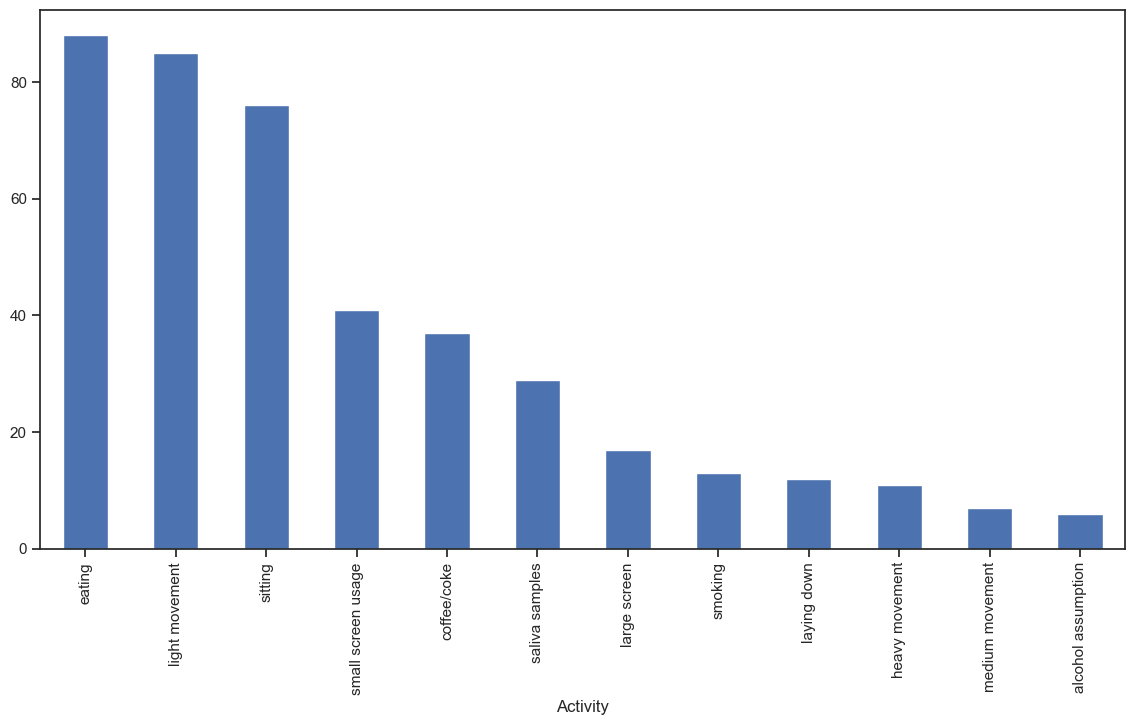

In [146]:
df_activity_count.plot(kind='bar', x='Activity', y='count', legend=False, figsize=(14, 7))

In [147]:
df_activity.groupby('Activity').describe()

Day                                              
                   count      mean       std  min  25%  50%   75%  max
Activity                                                              
alcohol assumption   6.0  1.333333  0.516398  1.0  1.0  1.0  1.75  2.0
coffee/coke         37.0  1.189189  0.397061  1.0  1.0  1.0  1.00  2.0
eating              88.0  1.147727  0.356863  1.0  1.0  1.0  1.00  2.0
heavy movement      11.0  1.181818  0.404520  1.0  1.0  1.0  1.00  2.0
large screen        17.0  1.117647  0.332106  1.0  1.0  1.0  1.00  2.0
laying down         12.0  1.583333  0.514929  1.0  1.0  2.0  2.00  2.0
light movement      85.0  1.235294  0.426700  1.0  1.0  1.0  1.00  2.0
medium movement      7.0  1.142857  0.377964  1.0  1.0  1.0  1.00  2.0
saliva samples      29.0  1.758621  0.435494  1.0  2.0  2.0  2.00  2.0
sitting             76.0  1.276316  0.450146  1.0  1.0  1.0  2.00  2.0
small screen usage  41.0  1.146341  0.357839  1.0  1.0  1.0  1.00  2.0
smoking             13.0  1.076923  0.277350  1.0  1.0  1.0  1.00  2.0

In [148]:
df_activity['Start'] = df_activity['Start'].replace('24:00', '00:00')
df_activity['End'] = df_activity['End'].replace('24:00', '00:00')

In [149]:
df_activity['Start'] = pd.to_datetime(df_activity['Start'], format='%H:%M')
df_activity['End'] = pd.to_datetime(df_activity['End'], format='%H:%M')

In [150]:
df_activity['End'] = df_activity['End'].where(
    df_activity['End'] >= df_activity['Start'], df_activity['End'] + pd.Timedelta(days=1))

df_activity['time'] = (df_activity['End'] - df_activity['Start']
                       ).dt.total_seconds() / 60  

In [151]:
df_activity[df_activity['Activity'] == 'smoking']

,Activity,Start,End,Day,user,time
2,smoking,1900-01-01 10:40:00,1900-01-01 10:45:00,1,user_1,5.0
7,smoking,1900-01-01 13:35:00,1900-01-01 13:40:00,1,user_1,5.0
11,smoking,1900-01-01 14:25:00,1900-01-01 14:30:00,1,user_1,5.0
13,smoking,1900-01-01 16:40:00,1900-01-01 16:45:00,1,user_1,5.0
15,smoking,1900-01-01 18:10:00,1900-01-01 18:20:00,1,user_1,10.0
21,smoking,1900-01-01 21:45:00,1900-01-01 21:50:00,1,user_1,5.0
23,smoking,1900-01-01 22:20:00,1900-01-01 22:25:00,1,user_1,5.0
25,smoking,1900-01-01 22:55:00,1900-01-01 23:00:00,1,user_1,5.0
26,smoking,1900-01-01 23:30:00,1900-01-01 23:35:00,1,user_1,5.0
11,smoking,1900-01-01 23:07:00,1900-01-01 23:12:00,1,user_10,5.0


In [155]:
df_activity.groupby(['Activity'])['time'].sum()

Activity
alcohol assumption     160.0
coffee/coke            385.0
eating                2059.0
heavy movement         460.0
large screen          1262.0
laying down            318.0
light movement        6202.0
medium movement         87.0
saliva samples         227.0
sitting               7086.0
small screen usage    3209.0
smoking                 70.0
Name: time, dtype: float64

In [156]:
df_question = Rd.create_dataset(users,'questionnaire')

In [158]:
df_question.shape

(22, 20)

In [168]:
df_group_Panas = pd.DataFrame()
for col in ['panas_pos_10', 'panas_pos_14', 'panas_pos_18', 'panas_pos_22', 'panas_pos_9+1']:
    df_PANAS = pd.DataFrame(df_question[col]).rename(columns={col: 'PANAS'})
    df_PANAS['var'] = col
    df_PANAS['emotion'] = 'positive'
    df_group_Panas = pd.concat([df_group_Panas, df_PANAS])

for col in ['panas_neg_10', 'panas_neg_14', 'panas_neg_18', 'panas_neg_22', 'panas_neg_9+1']:
    df_PANAS = pd.DataFrame(df_question[col]).rename(columns={col: 'PANAS'})
    df_PANAS['var'] = col
    df_PANAS['emotion'] = 'negative'
    df_group_Panas = pd.concat([df_group_Panas, df_PANAS])

df_group_Panas

,PANAS,var,emotion
0,21.0,panas_pos_10,positive
0,28.0,panas_pos_10,positive
0,23.0,panas_pos_10,positive
0,30.0,panas_pos_10,positive
0,22.0,panas_pos_10,positive
...,...,...,...
0,16.0,panas_neg_9+1,negative
0,16.0,panas_neg_9+1,negative
0,13.0,panas_neg_9+1,negative
0,10.0,panas_neg_9+1,negative


In [169]:
df_group_Panas = df_group_Panas.replace({'panas_pos_10': '1_10AM day 1', 'panas_pos_14': '2_2PM day 1', 'panas_pos_18': '3_6PM day 1', 'panas_pos_22': '4_10PM day 1', 'panas_pos_9+1': '5_9AM day 2',
                                         'panas_neg_10': '1_10AM day 1', 'panas_neg_14': '2_2PM day 1', 'panas_neg_18': '3_6PM day 1', 'panas_neg_22': '4_10PM day 1', 'panas_neg_9+1': '5_9AM day 2'})

([<matplotlib.axis.XTick at 0x23457e58ee0>,
 [Text(0, 0, '10AM day 1'),
  Text(1, 0, '2PM day 1'),
  Text(2, 0, '6PM day 1'),
  Text(3, 0, '10PM day 1'),
  Text(4, 0, '9AM day 2')])

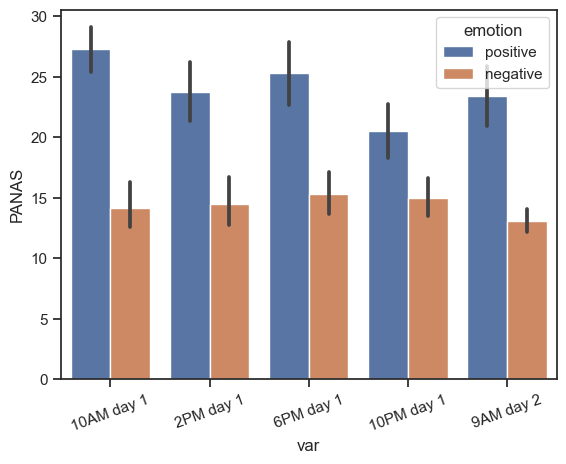

In [173]:
sns.barplot(x='var', y='PANAS', hue='emotion', data=df_group_Panas)
plt.xticks(list(range(5)), ['10AM day 1', '2PM day 1',
           '6PM day 1', '10PM day 1', '9AM day 2'], rotation=20)